# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:

from google.colab import files
import subprocess

# Upload the .ipynb file
uploaded = files.upload()

# Get the uploaded file name
notebook_name = list(uploaded.keys())[0]

# Convert the notebook to HTML
subprocess.run(["jupyter", "nbconvert", "--to", "html", notebook_name])

# Download the HTML file
html_name = notebook_name.replace(".ipynb", ".html")
files.download(html_name)

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the data file
df = pd.read_csv('/content/drive/My Drive/Foodhub_project/foodhub_order.csv')

In [ ]:
#Explpore the dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations:
In the dataset, there are 4 columns of type integer, on column of type float, and 4 columns of type object.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
In the dataset, there are 4 columns of type integer, on column of type float, and 4 columns of type object.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no null values in any of the columns.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
**Minimun time** for food preparation once an order is placed is **20 minuites**, the **average time** is **27.37 minuites** and the **maximaum time** is **35 minuites**.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df[df['rating'] == "Not given"].shape[0]


736

#### Observations:
The ratings of **736** orders are not given.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

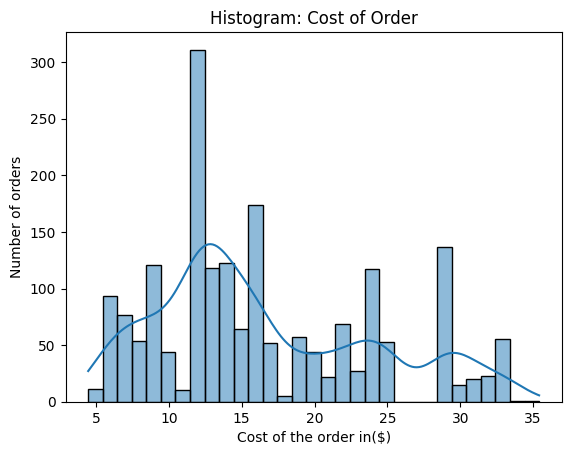

In [ ]:
plt.title('Histogram: Cost of Order')
plt.xlabel('Cost of the order in($)')
plt.ylabel('Number of orders')
sns.histplot(data=df,x='cost_of_the_order',binwidth=1,kde=True);


The cost of the order is positively skewed but it ranges from 5 dollars to 34 dollars.


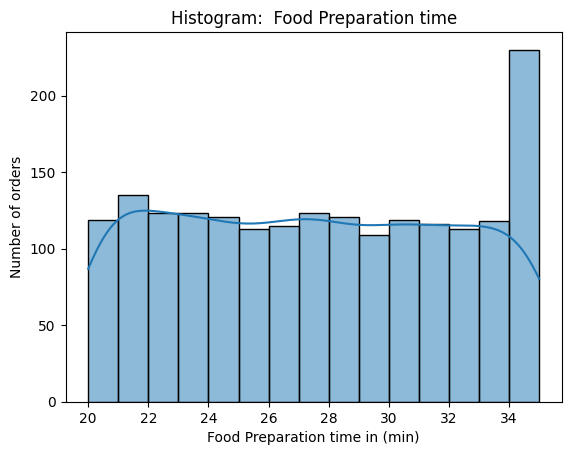

In [ ]:
plt.title('Histogram:  Food Preparation time')
plt.xlabel('Food Preparation time in (min)')
plt.ylabel('Number of orders')
sns.histplot(data=df,x='food_preparation_time',binwidth=1,kde=True);

The food preparation time is negatively skewed and ranges from 20 to 35 minuites.

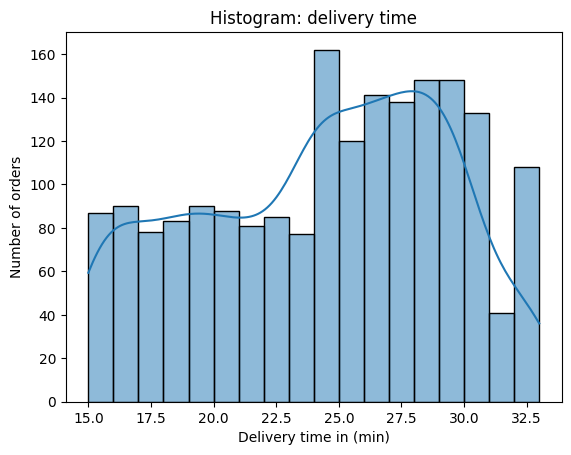

In [ ]:
plt.title('Histogram: delivery time')
plt.xlabel('Delivery time in (min)')
plt.ylabel('Number of orders')
sns.histplot(data=df,x='delivery_time',binwidth=1,kde=True);


Delivery time is slightly negatively skewed and ranges from 15 to 33 minuites.

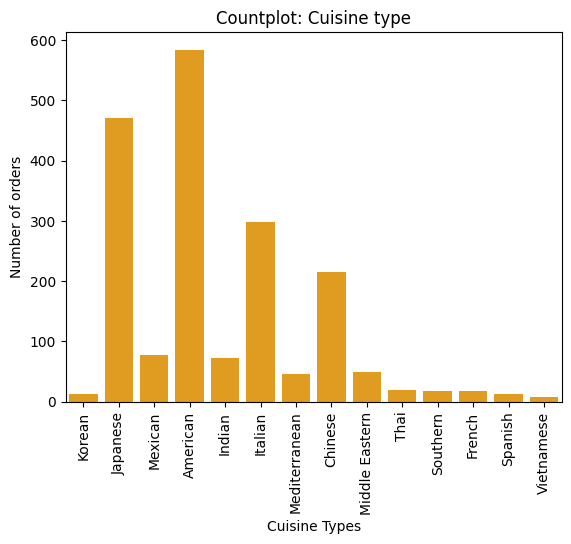

In [ ]:
plt.title('Countplot: Cuisine type')
plt.xlabel('Cuisine Types')
plt.ylabel('Number of orders')
sns.countplot(data =df,x='cuisine_type',color='orange');
plt.xticks(rotation=90);

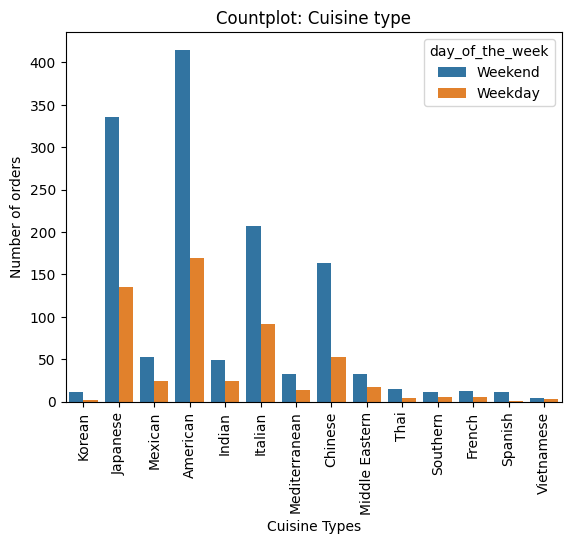

In [ ]:
plt.title('Countplot: Cuisine type')
plt.xlabel('Cuisine Types')
plt.ylabel('Number of orders')
sns.countplot(data =df,x='cuisine_type',hue='day_of_the_week');
plt.xticks(rotation=90);


American and Japanise types of food as mostly ordered by the customers in both weekdays and weekends. Therefore we can increase the number of American and Japanese restaurents because they are mostly wanted by our customers.

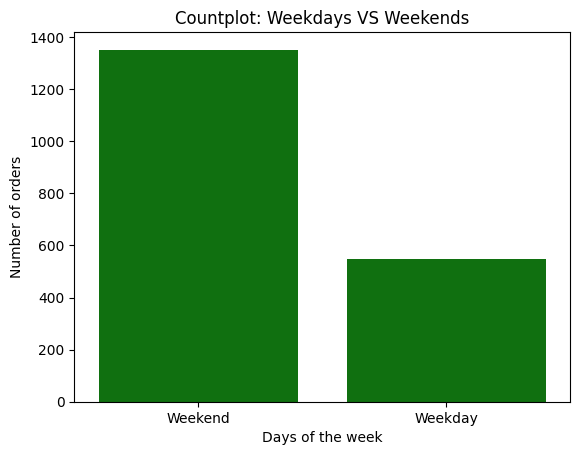

In [ ]:
plt.title('Countplot: Weekdays VS Weekends')
plt.xlabel('Days of the week')
plt.ylabel('Number of orders')
sns.countplot(data =df,x='day_of_the_week',color='green');

Weekend orders are more than weekdays orders.

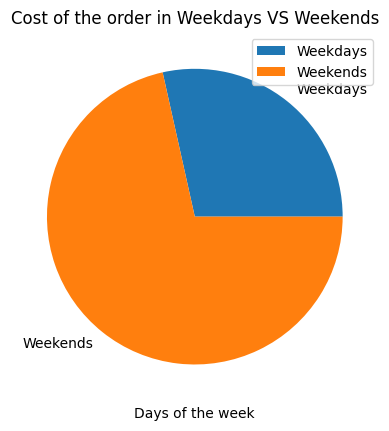

In [ ]:
#Cost of the order in Weekdays VS Weekends
plt.title('Cost of the order in Weekdays VS Weekends')
plt.xlabel('Days of the week')
dt = df.groupby(['day_of_the_week'])['cost_of_the_order'].sum()
plt.pie(dt,labels=["Weekdays","Weekends"])
plt.legend()
plt.show()


Number of orders and profit from weekend orders are more than weekdays orders. Therefore, we need to focus on weekend customers because they are more. we can increase marketing to weekdays orders by offering discounts or promotions.

In [ ]:
#analyzing the rating for each cuisine type
dt= df.groupby(['cuisine_type'])['rating'].value_counts()
dt

cuisine_type    rating   
American        Not given    216
                5            174
                4            130
                3             64
Chinese         Not given     82
                5             69
                4             40
                3             24
French          Not given      8
                5              5
                4              3
                3              2
Indian          5             32
                Not given     23
                4             13
                3              5
Italian         Not given    126
                5             90
                4             54
                3             28
Japanese        Not given    197
                5            142
                4             91
                3             40
Korean          4              4
                Not given      4
                5              3
                3              2
Mediterranean   5             16
                Not given     14
                3              9
                4              7
Mexican         Not given     29
                5             26
                4             16
                3              6
Middle Eastern  4             16
                Not given     15
                5             13
                3              5
Southern        4              7
                5              5
                Not given      4
                3              1
Spanish         Not given      6
                5              5
                4              1
Thai            Not given     10
                5              6
                4              3
Vietnamese      3              2
                5              2
                Not given      2
                4              1
Name: count, dtype: int64

In [ ]:
# analyzing the amount on not given rating orders
Perc_non_rated= df[df['rating']=='Not given'].shape[0]/df.shape[0]*100
print("Percentage of orders that are not rated = ",f"{Perc_non_rated:.2f}","%",sep='')

Percentage of orders that are not rated = 38.78%


In [ ]:
#replace the values of 'Not given" to null values for easier analysis
df['rating']=df['rating'].replace('Not given',np.nan)
df['rating']=df['rating'].astype(float)
dt= df.groupby(['cuisine_type'])['rating'].value_counts()
dt

cuisine_type    rating
American        5.0       174
                4.0       130
                3.0        64
Chinese         5.0        69
                4.0        40
                3.0        24
French          5.0         5
                4.0         3
                3.0         2
Indian          5.0        32
                4.0        13
                3.0         5
Italian         5.0        90
                4.0        54
                3.0        28
Japanese        5.0       142
                4.0        91
                3.0        40
Korean          4.0         4
                5.0         3
                3.0         2
Mediterranean   5.0        16
                3.0         9
                4.0         7
Mexican         5.0        26
                4.0        16
                3.0         6
Middle Eastern  4.0        16
                5.0        13
                3.0         5
Southern        4.0         7
                5.0         5
                3.0         1
Spanish         5.0         5
                4.0         1
Thai            5.0         6
                4.0         3
Vietnamese      3.0         2
                5.0         2
                4.0         1
Name: count, dtype: int64

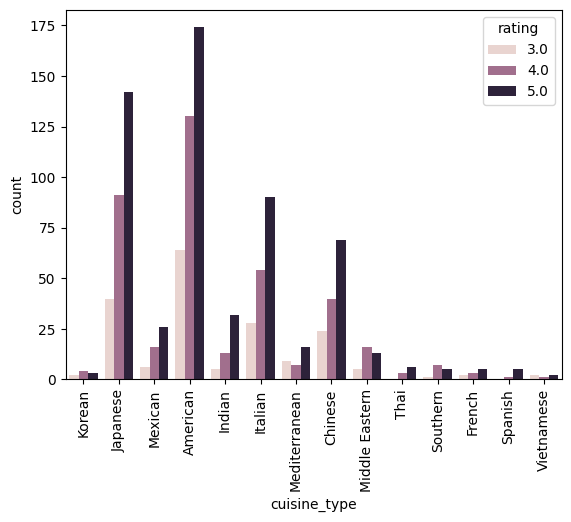

In [ ]:
sns.countplot(data =df,x='cuisine_type',hue='rating')
plt.xticks(rotation=90);


American and Japanese cuisines are top rated by customers in addition to Italian and chinese cuisines.

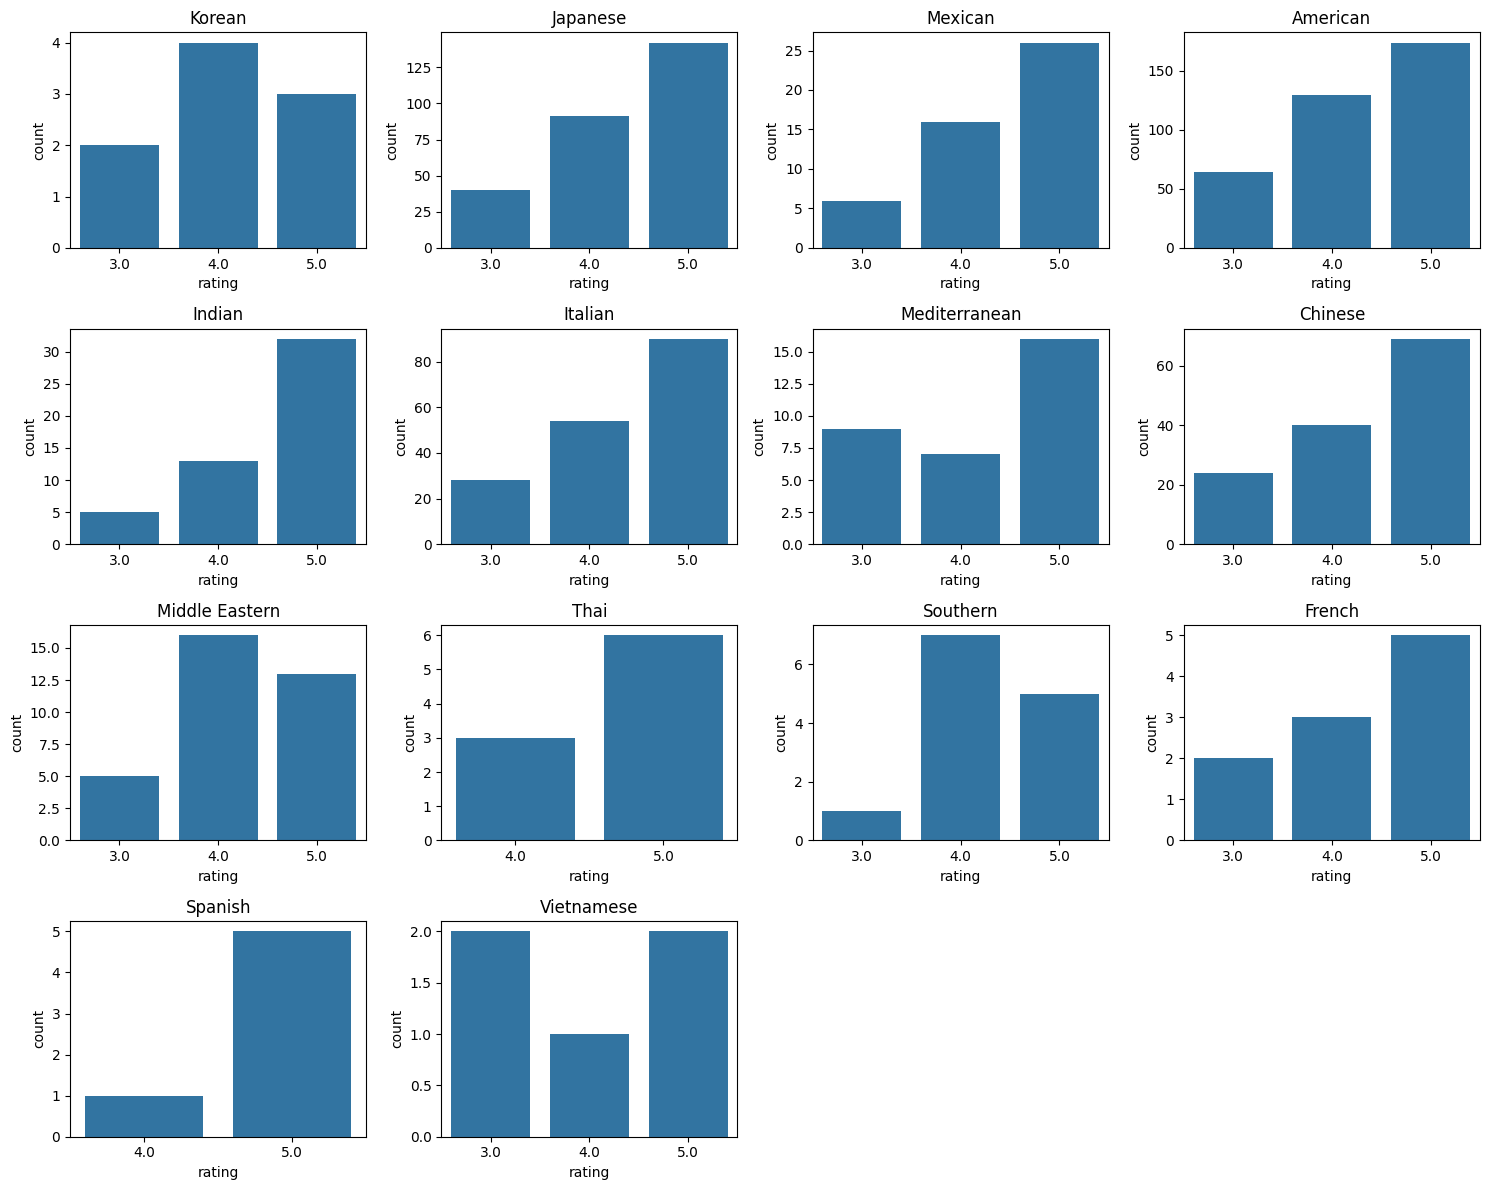

In [ ]:
ls_type= df['cuisine_type'].unique().tolist()
plt.figure(figsize=(15, 12))
for i,typ in enumerate(ls_type):
  plt.subplot(4,4,i+1)
  sns.countplot(data =df[df['cuisine_type']==typ],x='rating')
  plt.title(typ)
  plt.tight_layout()
plt.show()


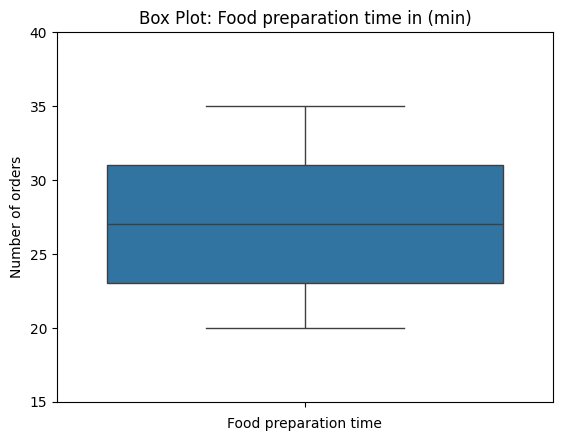

In [ ]:

plt.title('Box Plot: Food preparation time in (min)')
plt.xlabel('Food preparation time')
plt.ylabel('Number of orders')
plt.ylim(15,40);
sns.boxplot(df['food_preparation_time']);

Food preparation time ranges between 23 and 31 minuites. there are no outliers.

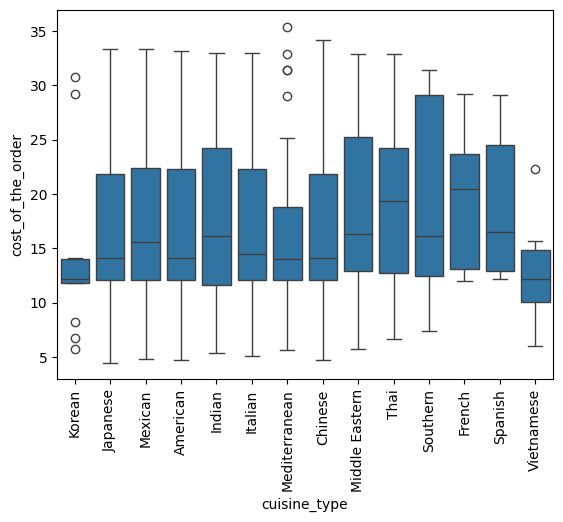

In [ ]:
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90);


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


The top 5 restaurants in terms of the number of orders received:

1. Shake Shack: received 219 orders
2. The Meatball Shop: received 132 orders
3. Blue Ribbon Suship: received 119 orders
4. Blue Ribbon Fried Chickenp: received 96 orders
5. Parmp: received 68 orders



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(1)

,count
cuisine_type,
American,415


#### Observations:


The most popular cuisine in the weekends is the **American cuisine**.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
Perc= df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100
print("Percentage of the orders that cost more than $20 = ",f"{Perc:.2f}","%",sep='')

Percentage of the orders that cost more than $20 = 29.24%


#### Observations:


Percentage of the orders that cost more than $20 = 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:


The mean order delinvery time is 24.16 min.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

The top 3 customers of maximum number of orders are:
1- Customer **52832** who made **13 orders**.
2- Customer **47440** who made **10 orders**.
3- Customer **83287** who made **9 orders**.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


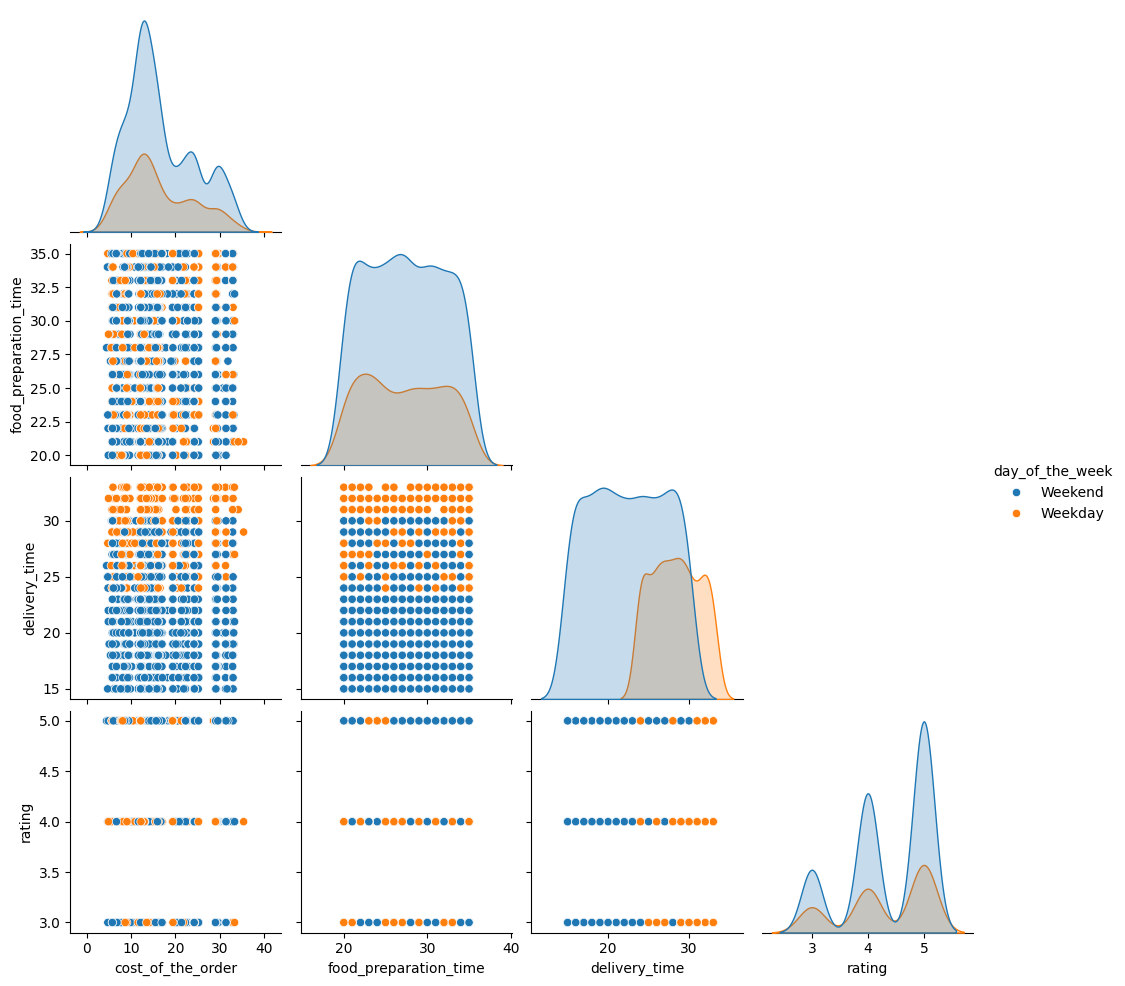

In [ ]:
sns.pairplot(df,vars=['cost_of_the_order','food_preparation_time','delivery_time','rating'],  hue='day_of_the_week', corner=True);

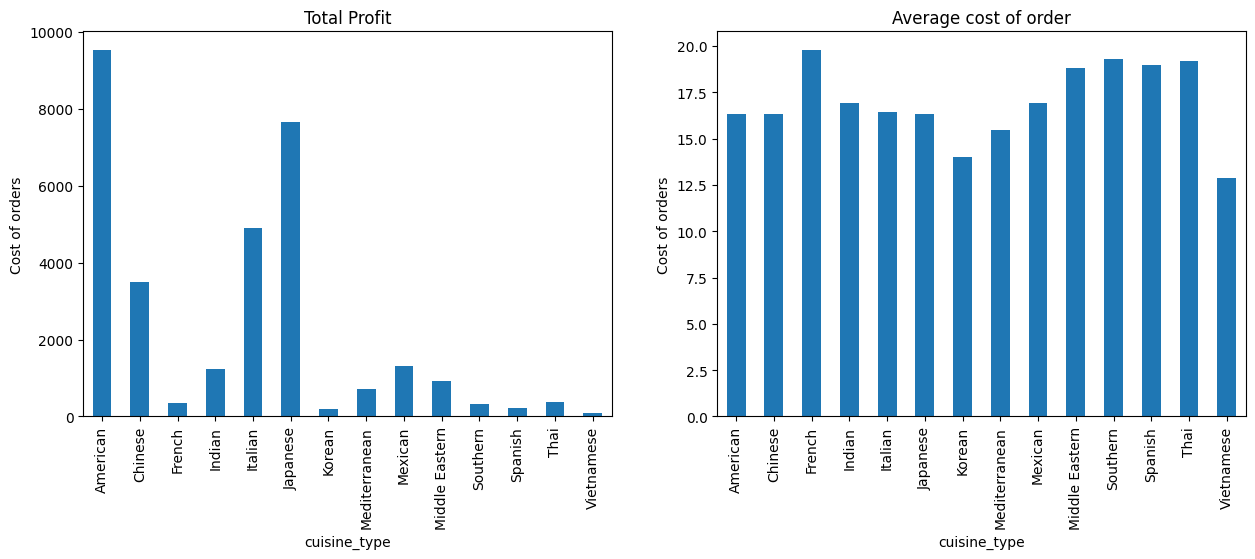

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Total Profit')
plt.xlabel('Cuisine Types')
plt.ylabel('Cost of orders')
dt = df.groupby(['cuisine_type'])['cost_of_the_order'].sum();
dt.plot(kind= 'bar')

plt.subplot(1, 2, 2)
plt.title('Average cost of order')
plt.xlabel('Cuisine Types')
plt.ylabel('Cost of orders')
dt = df.groupby(['cuisine_type'])['cost_of_the_order'].mean();
dt.plot(kind= 'bar');


plt.show()

Most profit is made by American , Japanese, and italian cuisines. This correlates with the number of orders made towards these cuisines and not the price of meals. we can see from the second plot that the average order cost among different cuisines is nearly the same excluding the korean and vitnamese cuisine which are cheaper choices.

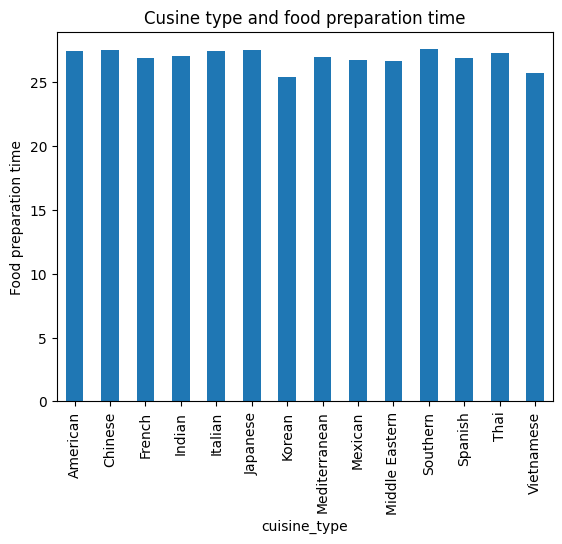

In [ ]:
plt.title('Cusine type and food preparation time')
plt.xlabel('Cusine type')
plt.ylabel('Food preparation time')
dt = df.groupby(['cuisine_type'])['food_preparation_time'].mean()
dt.plot(kind= 'bar');

We can see that the vetnamese and korean restaurents take relatively less time to prepare the order othan than other restaurents.

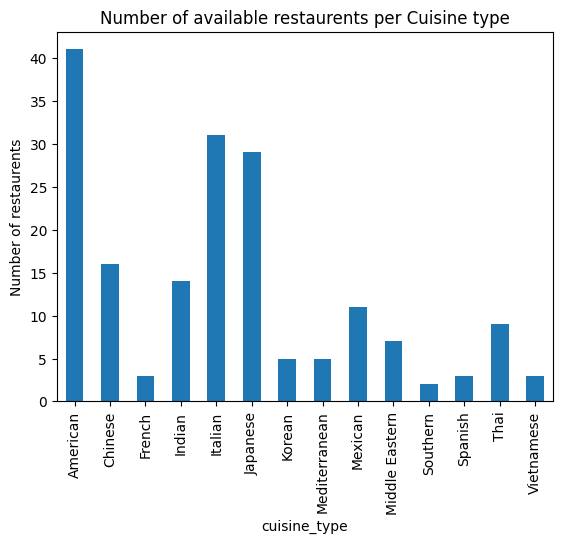

In [ ]:
dt= df.groupby(['cuisine_type'])['restaurant_name'].nunique()

plt.title('Number of available restaurents per Cuisine type')
plt.xlabel('Cusine type')
plt.ylabel('Number of restaurents')
dt.plot(kind= 'bar');

We can see that the American, Japanese and italian cuisines have the maximum number of available restaurents. this correlates also with the number of orders directed to these cuisines, as these 3 cuisines have the top number of orders. In order to increase the marketing for other cuisines, we need to include more restaurents for these types of cuisines.

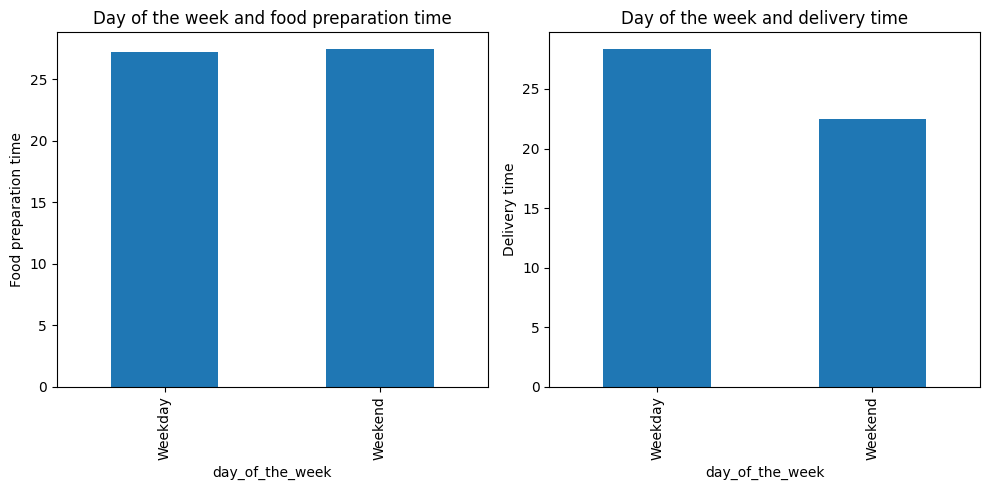

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Day of the week and food preparation time')
plt.xlabel('day of the week')
plt.ylabel('Food preparation time')
dt = df.groupby(['day_of_the_week'])['food_preparation_time'].mean()
dt.plot(kind= 'bar')

plt.subplot(1, 2, 2)
plt.title('Day of the week and delivery time')
plt.xlabel('day of the week')
plt.ylabel('Delivery time')
dt = df.groupby(['day_of_the_week'])['delivery_time'].mean()
dt.plot(kind= 'bar')
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show();

We can see that the food preparation time is the same in weekdays and weekends while the delivery time is longer in weekdays than weekends. maybe due to traffic.

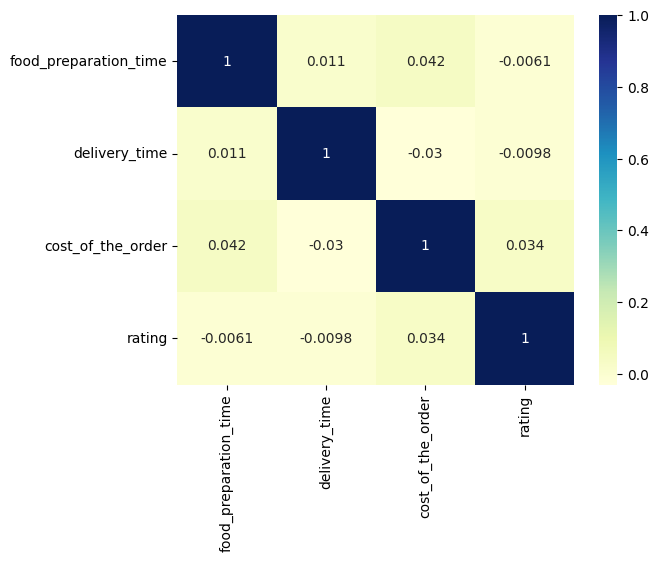

In [ ]:
#attempt heatmap analysis to study correlation
sns.heatmap(data=df[['food_preparation_time','delivery_time','cost_of_the_order','rating']].corr(), annot=True, cmap='YlGnBu');

There is weak correlation between cost, preparation time , delivery time and rating.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
dt= df.groupby(['restaurant_name']).filter(lambda x: (x['rating'].count()>50) & (x['rating'].mean()>4))
dt =dt[['restaurant_name']].drop_duplicates().reset_index(drop=True)
dt


,restaurant_name
0,Blue Ribbon Fried Chicken
1,The Meatball Shop
2,Shake Shack
3,Blue Ribbon Sushi


#### Observations:


As we can see, there are 4 restaurents that fulfill the criteria of number of ratings >50 and average rating is > 4. These restaurents are:

* Blue Ribbon Fried Chicken
* The Meatball Shop
* Shake Shack
* Blue Ribbon Sushi.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
rev25= df[df['cost_of_the_order']>20]['cost_of_the_order'].sum()*25/100
rev15= df[df['cost_of_the_order']>5]['cost_of_the_order'].sum()*15/100
Net_revenue = rev25 + rev15
print("The net revenue generated by the company across all orders is $",f"{Net_revenue:.2f}",sep='')

The net revenue generated by the company across all orders is $8379.54


#### Observations:


The net revenue generated by the company across all orders is** $8379.54**.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
Perc_orders= df[df['delivery_time']+df['food_preparation_time']>60].shape[0]/df.shape[0]*100
print("Percentage of orders that take more than 60 minutes to get delivered = ",f"{Perc_orders:.2f}","%",sep='')

Percentage of orders that take more than 60 minutes to get delivered = 10.54%


#### Observations:


Percentage of orders that take more than 60 minutes to get delivered = **10.54%.**

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()


,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:


The mean delivery time during **weekdays** is **28.34 min** while mean delivery time during **weekends** is **22.47 min**.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

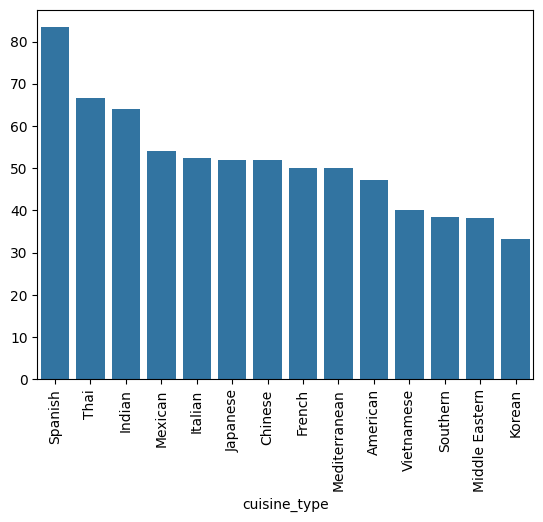

In [ ]:
#Calculate total number of orders per cuisine
total_orders = df.groupby('cuisine_type')['rating'].count()

# Calculate orders with rating > 4 per cuisine
high_rating_orders = df[df['rating'] > 4].groupby('cuisine_type')['rating'].count()

# Compute percentage and drop cuisines with no ratings
percentage_high_rating = (high_rating_orders / total_orders * 100).dropna().sort_values(ascending=False)

sns.barplot(x=percentage_high_rating.index, y=percentage_high_rating.values)
plt.xticks(rotation=90);



### Conclusions:
*  American and Japanese resturents are mostly liked by customers.
*  American , Japanese cuisines have the biggest number of available restaurents in the application.
* 38.78% of the orders are not given a rating. this percentage affects the precise evaluation of restaurents.
* Weekend orders are more preferable than weekdays orders.
* Delivery time is longer during weekdays than during weekends.
* Average Cost of orders in different cuisines are almost the same.
* Korean and vitnamese cuisines are the cheapest.
* korean and vitnamese restaurents consume less time to prepare the order.
* The percentage of high rating is directed to spanish, Thai and indian restaurents.

### Recommendations:

* We need to increase the number of restaurents for cuisines other than the American and Japanese, to give the customer more varieties to order more from these cuisines.
*  we can increase marketing to weekdays orders by offering discounts or promotions in addition to improving delivery time.
* 38.87% of the orders are not rated resulting in missing data in more than 1/3 of the rating information. this leads to poor and imprecise evaluation of restaurents.
* We can encourage the customer to rate his order by offering discounts, vouchers or promotions after submitting his rating.
* rating should be divided into 2 categories: one related to quality of food and the other realated to delivery.
* Discounts should be offered to restaurents of more orders and high rating. This encourages the restaurents to provide higher quality service to increase their rating and think of ways to attract more customers.

---